DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS

Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Raw data

In [3]:
df=pd.read_csv('blinkit_data.csv')

Sample Data

In [4]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


Information of data

In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
pd.isnull(df).sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

Data cleaning

In [8]:
df.fillna(0, inplace=True)

In [9]:
pd.isnull(df).sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [11]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat',
                                                       'low fat':'Low Fat',
                                                       'reg':'Regular'
                                                       })

In [12]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


BUSINESS REQUIREMENTS

KPI's Requirements

In [13]:
#total sales
total_sales=df['Sales'].sum()

#avg sales
avg_sales=df['Sales'].mean()

#no. of item sold
items_sold=df['Sales'].count()

#avg rating
avg_rating=df['Rating'].mean()

#Display
print(f"Total Sales: ${total_sales:.0f}")
print(f"Average Sales: ${avg_sales:.0f}")
print(f"Number of Items Sold: {items_sold}")
print(f"Average Rating: {avg_rating:.0f}")


Total Sales: $1201681
Average Sales: $141
Number of Items Sold: 8523
Average Rating: 4


CHARTS REQUIREMENTS

Total sales by fat content

Text(0.5, 1.0, 'Sales by Fat Content')

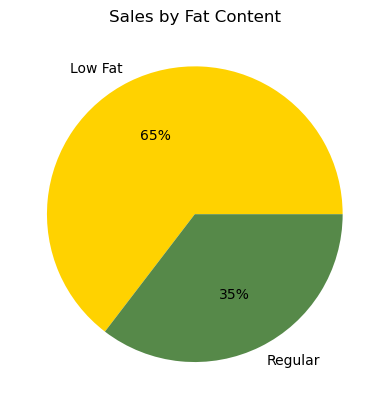

In [14]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat , 
        labels = sales_by_fat.index, 
        autopct='%.0f%%',
        colors=[ '#FFD200','#568949'])
plt.title('Sales by Fat Content')

Total Salesby Item Type

Text(0, 0.5, 'Total sales')

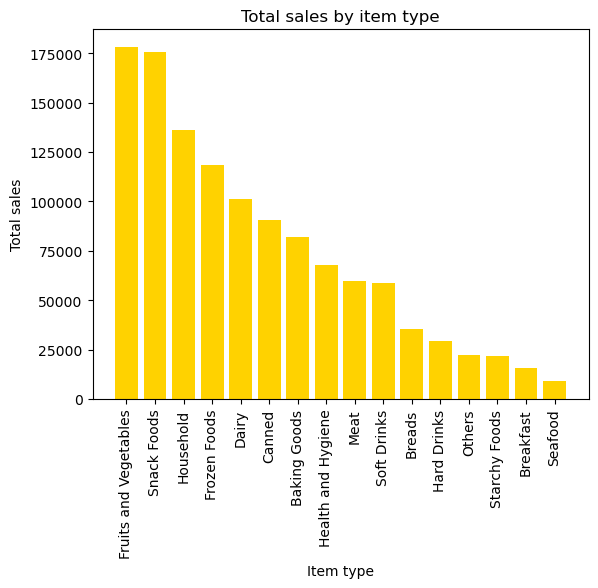

In [15]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.bar(sales_by_type.index , sales_by_type.values, color='#FFD200')

plt.xticks(rotation=90)
plt.title('Total sales by item type')
plt.xlabel('Item type')
plt.ylabel('Total sales')

Fat content by outlet for total sales

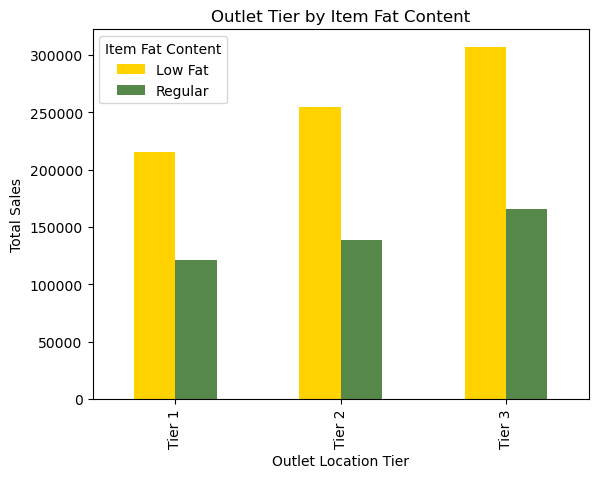

In [16]:
df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack().plot(
    kind="bar",
    color=['#FFD200','#568949']   
)

plt.title('Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.show()


Text(0, 0.5, 'Total sales')

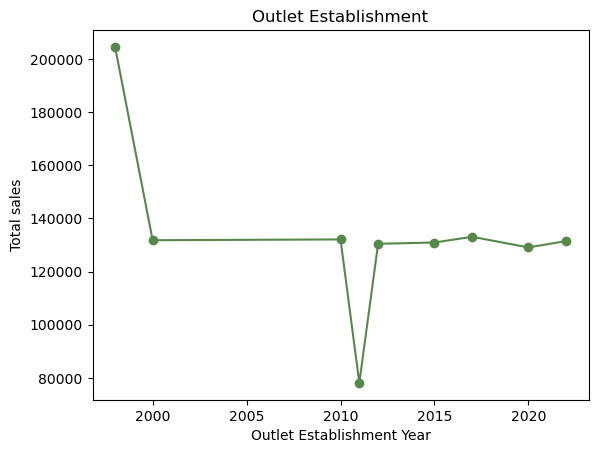

In [17]:
sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.plot(sales_by_year.index , sales_by_year.values, marker='o' ,color='#568949')

plt.title('Outlet Establishment')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total sales')

Sales by outlet size

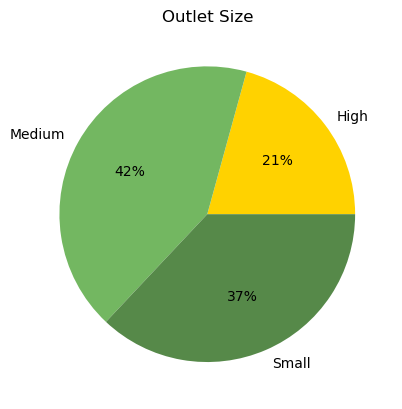

In [18]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.pie(
    sales_by_size, 
    labels=sales_by_size.index, 
    autopct='%.0f%%',
    colors=['#FFD200', '#73B761', '#568949']  
)
plt.title('Outlet Size')
plt.show()


Sales by Outlet Location

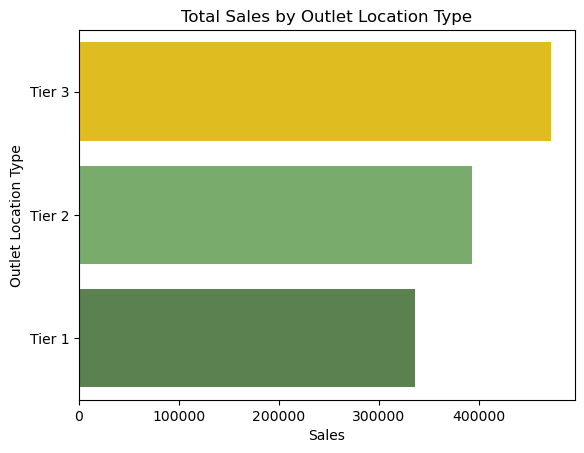

In [19]:
sales_by_location = (
    df.groupby('Outlet Location Type')['Sales']
      .sum()
      .reset_index()
      .sort_values('Sales', ascending=False)
)
sns.barplot(
    x='Sales', 
    y='Outlet Location Type', 
    data= sales_by_location,
    hue='Outlet Location Type',
    palette=['#FFD200', '#73B761', '#568949'],
    legend=False             
)

plt.title('Total Sales by Outlet Location Type')
plt.show()
